In [1]:
pip install bls

Note: you may need to restart the kernel to use updated packages.


In [2]:
# export BLS_API_KEY=7b14d5fe17554c16863bf3617a831ec5

In [3]:
# Import dependencies
import pandas as pd
import matplotlib as plt
import numpy as np
import bls


In [4]:
#Get Wages data from CPI
wages = bls.get_series('CIU2020000000000A')
wages.head()

date
2012Q1    1.9
2012Q2    1.8
2012Q3    1.8
2012Q4    1.7
2013Q1    1.7
Freq: Q-DEC, Name: CIU2020000000000A, dtype: float64

In [5]:
# Get CPI data from BLS
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('cpi_data.csv')
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data.columns = 'Date', "CPI"
cpi_data

,Date,CPI
0,2012-01,226.665
1,2012-02,227.663
2,2012-03,229.392
3,2012-04,230.085
4,2012-05,229.815
...,...,...
113,2021-06,271.696
114,2021-07,273.003
115,2021-08,273.567
116,2021-09,274.310


In [6]:
# Replace Mar, Jun, Sept, Dec with Qtr
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')
cpi_data["Date"]

0      2012-01
1      2012-02
2       2012Q1
3      2012-04
4      2012-05
        ...   
113     2021Q2
114    2021-07
115    2021-08
116     2021Q3
117    2021-10
Name: Date, Length: 118, dtype: object

In [7]:
# Get only quarterly info
newcpi_data = cpi_data[(cpi_data.Date.str.contains("-")==False)]
newcpi_data.head()

,Date,CPI
2,2012Q1,229.392
5,2012Q2,229.478
8,2012Q3,231.407
11,2012Q4,229.601
14,2013Q1,232.773


In [8]:
# Write this data to CSV file
newcpi_data.to_csv('cpi-clean.csv')

In [9]:
wages = bls.get_series('CIU2020000000000A')
wages.to_csv("bls_wages_data.csv")
df = pd.read_csv('bls_wages_data.csv')
df.columns = 'Date', 'Wages'
df.head()

,Date,Wages
0,2012Q1,1.9
1,2012Q2,1.8
2,2012Q3,1.8
3,2012Q4,1.7
4,2013Q1,1.7


In [10]:
# Wages above are annualized
# Function to make the approximately quarterly by feeding it the starting (2012Q1) CPI value of 229.392 as the baseline
newnum = 229.392
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x/400) * newnum + newnum
        return newnum
    else:
        return
newwages_data = df.applymap(process_wages)
newwages_data.head()


,Date,Wages
0,2012Q1,230.481612
1,2012Q2,231.518779
2,2012Q3,232.560614
3,2012Q4,233.548996
4,2013Q1,234.541580


In [11]:
# Merge the data to a single dataframe
merged_data = pd.merge(newcpi_data, newwages_data, on = 'Date')
merged_data.head()

,Date,CPI,Wages
0,2012Q1,229.392,230.481612
1,2012Q2,229.478,231.518779
2,2012Q3,231.407,232.560614
3,2012Q4,229.601,233.548996
4,2013Q1,232.773,234.541580


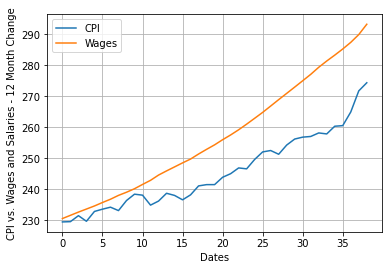

In [12]:
# Plot the data
ax = merged_data.plot(kind='line')
ax.set_ylabel('CPI vs. Wages and Salaries - 12 Month Change')
ax.set_xlabel('Dates')
ax.grid()

In [13]:
# Get the housing data for the time period
housing = bls.get_series('SUUR0000SAH')
housing.to_csv('housing_index.csv')
housing

date
2012-01    130.944
2012-02    131.026
2012-03    131.235
2012-04    131.392
2012-05    131.569
            ...   
2021-06    163.678
2021-07    164.404
2021-08    164.855
2021-09    165.642
2021-10    166.528
Freq: M, Name: SUUR0000SAH, Length: 118, dtype: float64

In [14]:
# Read the CSV file and add column headers
housing_data = pd.read_csv('housing_index.csv')
housing_data.columns = 'Date', "Housing Index"
housing_data.head()

,Date,Housing Index
0,2012-01,130.944
1,2012-02,131.026
2,2012-03,131.235
3,2012-04,131.392
4,2012-05,131.569


In [15]:
# Replace Mar, Jun, Sept, Dec with Qtr
housing_data['Date'] = housing_data['Date'].str.replace('-03', 'Q1')
housing_data['Date'] = housing_data['Date'].str.replace('-06', 'Q2')
housing_data['Date'] = housing_data['Date'].str.replace('-09', 'Q3')
housing_data['Date'] = housing_data['Date'].str.replace('-12', 'Q4')
housing_data["Date"]

0      2012-01
1      2012-02
2       2012Q1
3      2012-04
4      2012-05
        ...   
113     2021Q2
114    2021-07
115    2021-08
116     2021Q3
117    2021-10
Name: Date, Length: 118, dtype: object

In [16]:
# Get only quarterly info
newhousing_data = housing_data[(housing_data.Date.str.contains("-")==False)]
newhousing_data.head()

,Date,Housing Index
2,2012Q1,131.235
5,2012Q2,132.227
8,2012Q3,132.540
11,2012Q4,132.617
14,2013Q1,133.520


In [17]:
# Write this data to CSV file
housing_data.to_csv('housing-clean.csv')

In [18]:
# Merge the housing data with wages data
new_merged_data = pd.merge(newwages_data, newhousing_data, on = 'Date')
new_merged_data.head()

,Date,Wages,Housing Index
0,2012Q1,230.481612,131.235
1,2012Q2,231.518779,132.227
2,2012Q3,232.560614,132.540
3,2012Q4,233.548996,132.617
4,2013Q1,234.541580,133.520


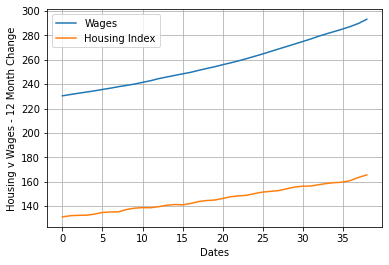

In [19]:
# Plot the data
ax = new_merged_data.plot(kind='line')
ax.set_ylabel('Housing v Wages - 12 Month Change')
ax.set_xlabel('Dates')
ax.grid()